# Comprehensive Exploratory Data Analysis for Alzheimer's Detection System

## 1. Import Required Libraries

In [2]:
# Core libraries
import pandas as pd
import numpy as np
import os
import warnings
from pathlib import Path

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, pointbiserialr

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Configure settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 100)

# Create output directory
output_dir = Path('../outputs/eda')
output_dir.mkdir(parents=True, exist_ok=True)

print("✅ All libraries imported successfully!")
print(f"📁 Output directory: {output_dir}")
print(f"📊 Matplotlib backend: {plt.get_backend()}")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")

✅ All libraries imported successfully!
📁 Output directory: ..\outputs\eda
📊 Matplotlib backend: module://matplotlib_inline.backend_inline
🐼 Pandas version: 2.3.3
🔢 NumPy version: 2.3.5


## 2. Load Dataset and Initial Overview

In [13]:
# Load the dataset
try:
    df = pd.read_csv('../data/alzheimer_dataset.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: alzheimer_dataset.csv not found in ../data/ directory")
    print("Please ensure the dataset is placed in the correct location.")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")

# Display first 10 rows
print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET")
print("="*80)
df.head(10)

✅ Dataset loaded successfully!

FIRST 10 ROWS OF THE DATASET


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid
5,4756,86,1,1,1,30.626886,0,4.140144,0.211062,1.584922,7.261953,0,0,1,0,0,0,168,62,280.712539,198.334629,79.080503,263.943655,27.517529,5.510144,0,0,9.015686,1,0,0,0,0,0,XXXConfid
6,4757,68,0,3,2,38.387622,1,0.646047,9.257695,5.897388,5.477686,0,0,0,0,1,0,143,88,263.734149,52.470670,66.533369,216.489175,1.964413,6.062124,0,0,9.236328,0,0,0,0,1,0,XXXConfid
7,4758,75,0,0,1,18.776009,0,13.723826,4.649451,8.341903,4.213210,0,0,0,0,0,0,117,63,151.383137,69.623510,77.346816,210.570866,10.139568,3.401374,0,0,4.517248,1,0,0,0,1,1,XXXConfid
8,4759,72,1,1,0,27.833188,0,12.167848,1.531360,6.736882,5.748224,0,0,0,0,0,1,117,119,233.605755,144.045740,43.075893,151.164186,25.820732,7.396061,0,1,0.756232,0,0,1,0,0,0,XXXConfid
9,4760,87,0,0,0,35.456302,1,16.028688,6.440773,8.086019,7.551773,0,1,0,0,0,0,130,78,281.630050,130.497580,74.291247,144.175975,28.388409,1.148904,0,1,4.554394,0,0,0,0,0,0,XXXConfid


## 3. Dataset Overview Analysis

In [12]:
# Basic dataset information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)

print(f"📊 Dataset Shape: {df.shape}")
print(f"📝 Number of Rows: {df.shape[0]:,}")
print(f"🗂️ Number of Columns: {df.shape[1]}")
print("\n" + "-"*50)
print("COLUMN NAMES AND DATA TYPES")
print("-"*50)

# Display column information
col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Null %': (df.isnull().sum() / len(df) * 100).round(2)
})

print(col_info.to_string(index=False))

print("\n" + "-"*50)
print("DATA TYPE SUMMARY")
print("-"*50)
print(df.dtypes.value_counts())

print("\n" + "-"*50)
print("DUPLICATE ROWS CHECK")
print("-"*50)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {duplicate_count/len(df)*100:.2f}%")
else:
    print("✅ No duplicate rows found!")

DATASET OVERVIEW
📊 Dataset Shape: (2149, 35)
📝 Number of Rows: 2,149
🗂️ Number of Columns: 35

--------------------------------------------------
COLUMN NAMES AND DATA TYPES
--------------------------------------------------
                   Column Data Type  Non-Null Count  Null Count  Null %
                PatientID     int64            2149           0     0.0
                      Age     int64            2149           0     0.0
                   Gender     int64            2149           0     0.0
                Ethnicity     int64            2149           0     0.0
           EducationLevel     int64            2149           0     0.0
                      BMI   float64            2149           0     0.0
                  Smoking     int64            2149           0     0.0
       AlcoholConsumption   float64            2149           0     0.0
         PhysicalActivity   float64            2149           0     0.0
              DietQuality   float64            2149    

## 4. Missing Values Analysis

In [15]:
# Count missing values per column
missing_data = df.isnull().sum()

# Check if any missing values exist
if missing_data.any():
    print("⚠️ Missing values detected!\n")
    print("📌 Columns with missing values:")
    print(missing_data[missing_data > 0])
    df_clean = df.dropna()
    print(f"\n🧹 Cleaned dataset! New shape: {df_clean.shape}")

else:
    print("✅ No missing values found in the dataset!")


✅ No missing values found in the dataset!


## 5. Statistical Summary

In [18]:
# Statistical summary for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("="*80)
print("STATISTICAL SUMMARY FOR NUMERICAL FEATURES")
print("="*80)
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Numerical columns: {numerical_cols}")

print("\nDetailed Statistical Summary:")
summary_stats = df[numerical_cols].describe()
print(summary_stats)

# Additional statistics
print("\n" + "-"*80)
print("ADDITIONAL STATISTICS")
print("-"*80)

additional_stats = pd.DataFrame({
    'Feature': numerical_cols,
    'Skewness': [df[col].skew() for col in numerical_cols],
    'Kurtosis': [df[col].kurtosis() for col in numerical_cols],
    'Variance': [df[col].var() for col in numerical_cols]
})

print(additional_stats.to_string(index=False))

# Identify potential outliers using IQR method
print("\n" + "-"*80)
print("OUTLIER DETECTION (IQR METHOD)")
print("-"*80)

outlier_summary = []
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Outlier Count': outlier_count,
        'Outlier %': outlier_percentage,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

STATISTICAL SUMMARY FOR NUMERICAL FEATURES
Number of numerical columns: 34
Numerical columns: ['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']

Detailed Statistical Summary:
         PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   


## 6. Target Variable Analysis

Understanding the distribution of our target variable (Diagnosis) is crucial for classification tasks.

TARGET VARIABLE ANALYSIS
Diagnosis Distribution:
  0: 1,389 samples (64.63%)
  1: 760 samples (35.37%)


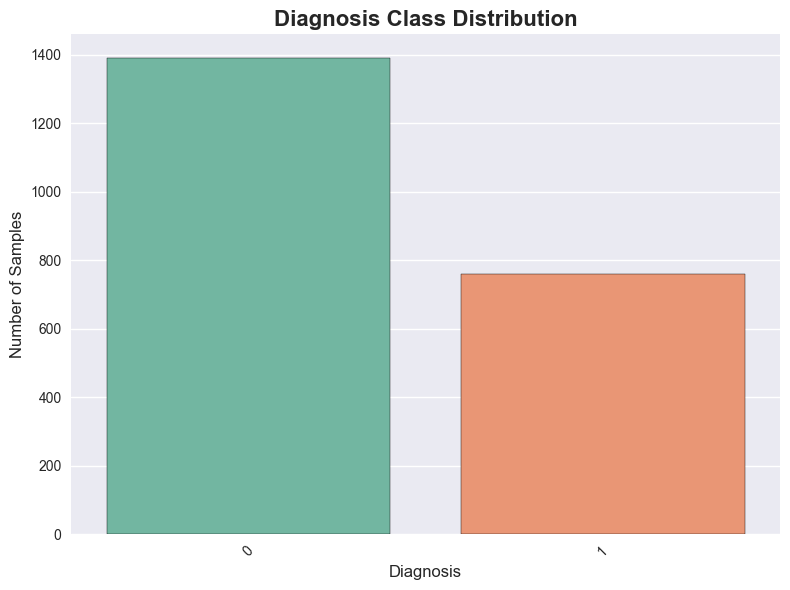

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable analysis
if 'Diagnosis' in df.columns:
    print("="*60)
    print("TARGET VARIABLE ANALYSIS")
    print("="*60)

    diagnosis_counts = df['Diagnosis'].value_counts()
    diagnosis_percent = df['Diagnosis'].value_counts(normalize=True) * 100

    print("Diagnosis Distribution:")
    for diagnosis, count in diagnosis_counts.items():
        percent = diagnosis_percent[diagnosis]
        print(f"  {diagnosis}: {count:,} samples ({percent:.2f}%)")

    plt.figure(figsize=(8, 6))
    sns.barplot(x=diagnosis_counts.index, y=diagnosis_counts.values, palette='Set2', edgecolor='black')
    plt.title('Diagnosis Class Distribution', fontsize=16, fontweight='bold')
    plt.xlabel('Diagnosis', fontsize=12)
    plt.ylabel('Number of Samples', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

else:
    print("❌ 'Diagnosis' column not found in the dataset!")


## 7. Demographic Analysis

DEMOGRAPHIC ANALYSIS

🎂 AGE ANALYSIS
------------------------------
Age range: 60 - 90 years
Mean age: 74.9 ± 9.0 years
Median age: 75.0 years


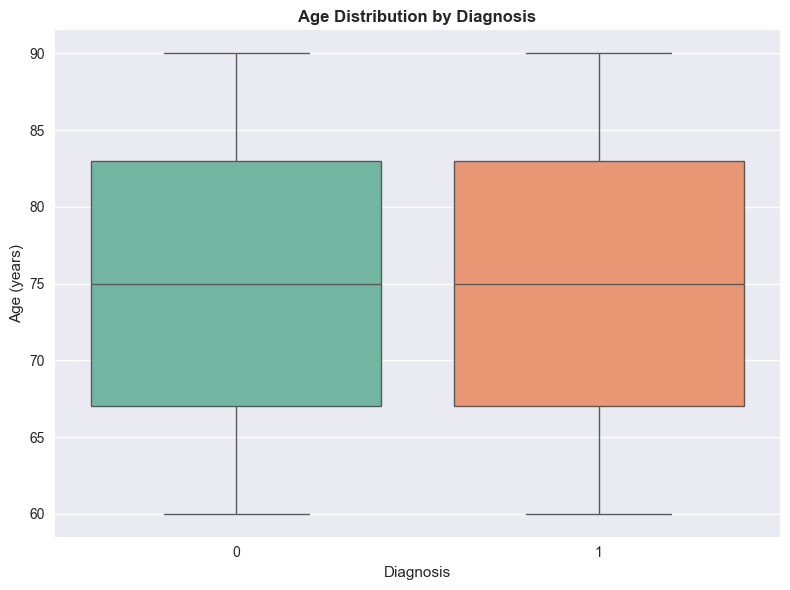


👫 GENDER ANALYSIS
------------------------------
  1: 1,088 (50.6%)
  0: 1,061 (49.4%)


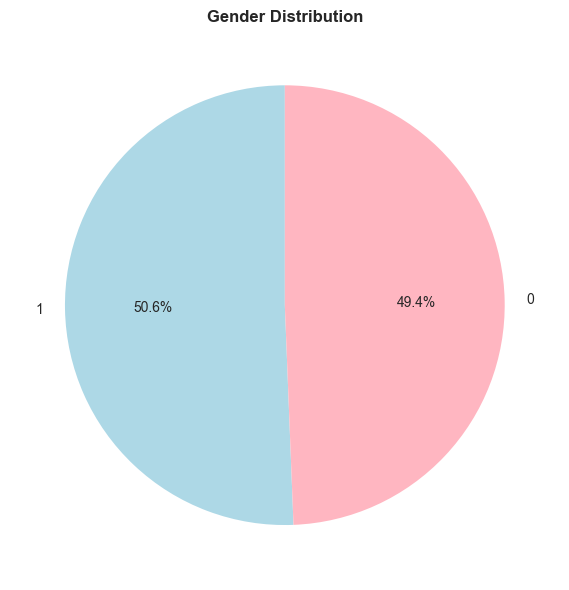


🌍 ETHNICITY ANALYSIS
------------------------------
  0: 1,278 (59.5%)
  1: 454 (21.1%)
  3: 211 (9.8%)
  2: 206 (9.6%)


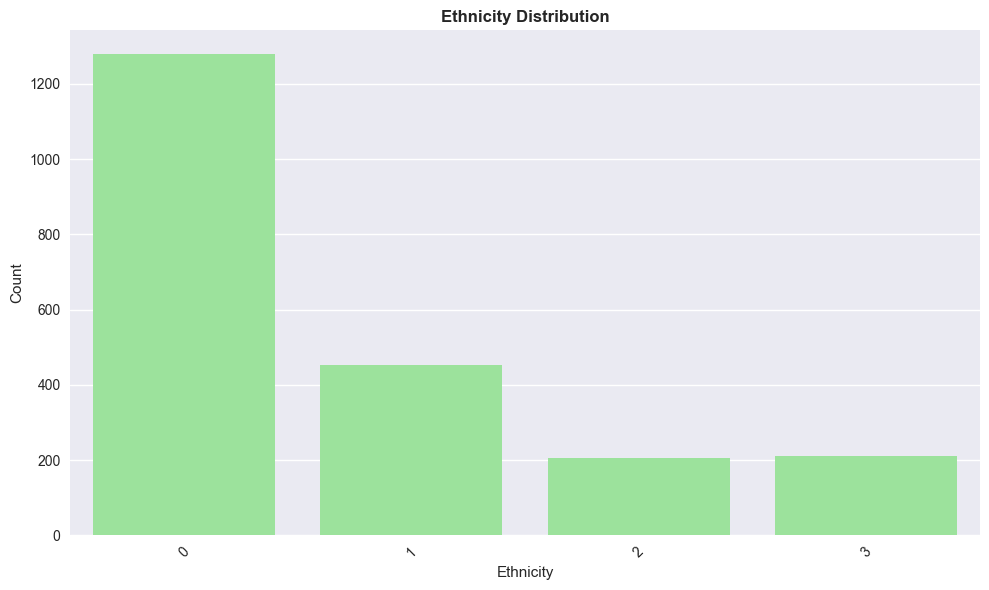


🎓 EDUCATION LEVEL ANALYSIS
------------------------------
  1: 854 (39.7%)
  2: 636 (29.6%)
  0: 446 (20.8%)
  3: 213 (9.9%)


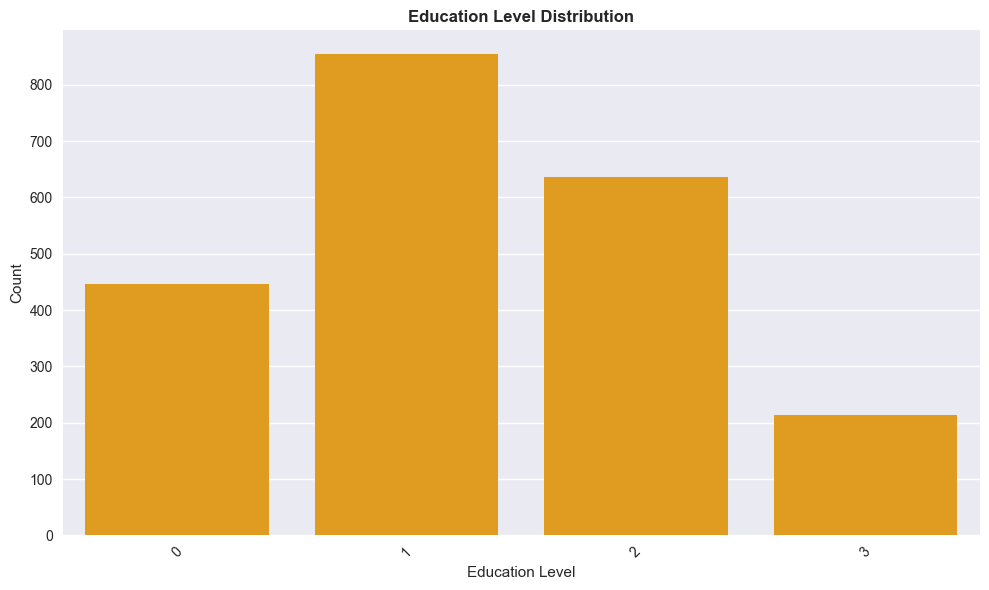

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("="*80)
print("DEMOGRAPHIC ANALYSIS")
print("="*80)

# ---------------- AGE ANALYSIS ----------------
if 'Age' in df.columns:
    print("\n🎂 AGE ANALYSIS")
    print("-" * 30)
    print(f"Age range: {df['Age'].min()} - {df['Age'].max()} years")
    print(f"Mean age: {df['Age'].mean():.1f} ± {df['Age'].std():.1f} years")
    print(f"Median age: {df['Age'].median():.1f} years")

    # Boxplot (shows spread & outliers clearly)
    plt.figure(figsize=(8, 6))
    if 'Diagnosis' in df.columns:
        sns.boxplot(data=df, x='Diagnosis', y='Age', palette='Set2')
        plt.title('Age Distribution by Diagnosis', fontweight='bold')
        plt.xlabel('Diagnosis')
        plt.ylabel('Age (years)')
    else:
        sns.histplot(df['Age'], bins=20, color='skyblue', edgecolor='black', kde=True)
        plt.title('Age Distribution', fontweight='bold')
        plt.xlabel('Age (years)')
    plt.tight_layout()
    plt.show()

# ---------------- GENDER ANALYSIS ----------------
if 'Gender' in df.columns:
    print("\n👫 GENDER ANALYSIS")
    print("-" * 30)
    gender_counts = df['Gender'].value_counts()
    gender_percent = df['Gender'].value_counts(normalize=True) * 100

    for gender, count in gender_counts.items():
        print(f"  {gender}: {count:,} ({gender_percent[gender]:.1f}%)")

    # Pie chart (for gender proportion)
    plt.figure(figsize=(6, 6))
    colors = ['lightblue', 'lightpink']
    plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
    plt.title('Gender Distribution', fontweight='bold')
    plt.tight_layout()
    plt.show()

# ---------------- ETHNICITY ANALYSIS ----------------
if 'Ethnicity' in df.columns:
    print("\n🌍 ETHNICITY ANALYSIS")
    print("-" * 30)
    ethnicity_counts = df['Ethnicity'].value_counts()
    ethnicity_percent = df['Ethnicity'].value_counts(normalize=True) * 100

    for ethnicity, count in ethnicity_counts.items():
        print(f"  {ethnicity}: {count:,} ({ethnicity_percent[ethnicity]:.1f}%)")

    # Bar chart (for categorical comparison)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, color='lightgreen')
    plt.title('Ethnicity Distribution', fontweight='bold')
    plt.xlabel('Ethnicity')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# ---------------- EDUCATION LEVEL ANALYSIS ----------------
if 'EducationLevel' in df.columns:
    print("\n🎓 EDUCATION LEVEL ANALYSIS")
    print("-" * 30)
    education_counts = df['EducationLevel'].value_counts()
    education_percent = df['EducationLevel'].value_counts(normalize=True) * 100

    for education, count in education_counts.items():
        print(f"  {education}: {count:,} ({education_percent[education]:.1f}%)")

    # Bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=education_counts.index, y=education_counts.values, color='orange')
    plt.title('Education Level Distribution', fontweight='bold')
    plt.xlabel('Education Level')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 13. Correlation Analysis


CORRELATION ANALYSIS

🎯 IDENTIFYING TOP 15 FEATURES CORRELATED WITH DIAGNOSIS
------------------------------------------------------------
Top 15 features correlated with Diagnosis:
 1. Diagnosis: 1.0000
 2. FunctionalAssessment: 0.3649
 3. ADL: 0.3323
 4. MemoryComplaints: 0.3067
 5. MMSE: 0.2371
 6. BehavioralProblems: 0.2244
 7. SleepQuality: 0.0565
 8. EducationLevel: 0.0440
 9. CholesterolHDL: 0.0426
10. PatientID: 0.0410
11. Hypertension: 0.0351
12. FamilyHistoryAlzheimers: 0.0329
13. CholesterolLDL: 0.0320
14. Diabetes: 0.0315
15. CardiovascularDisease: 0.0315


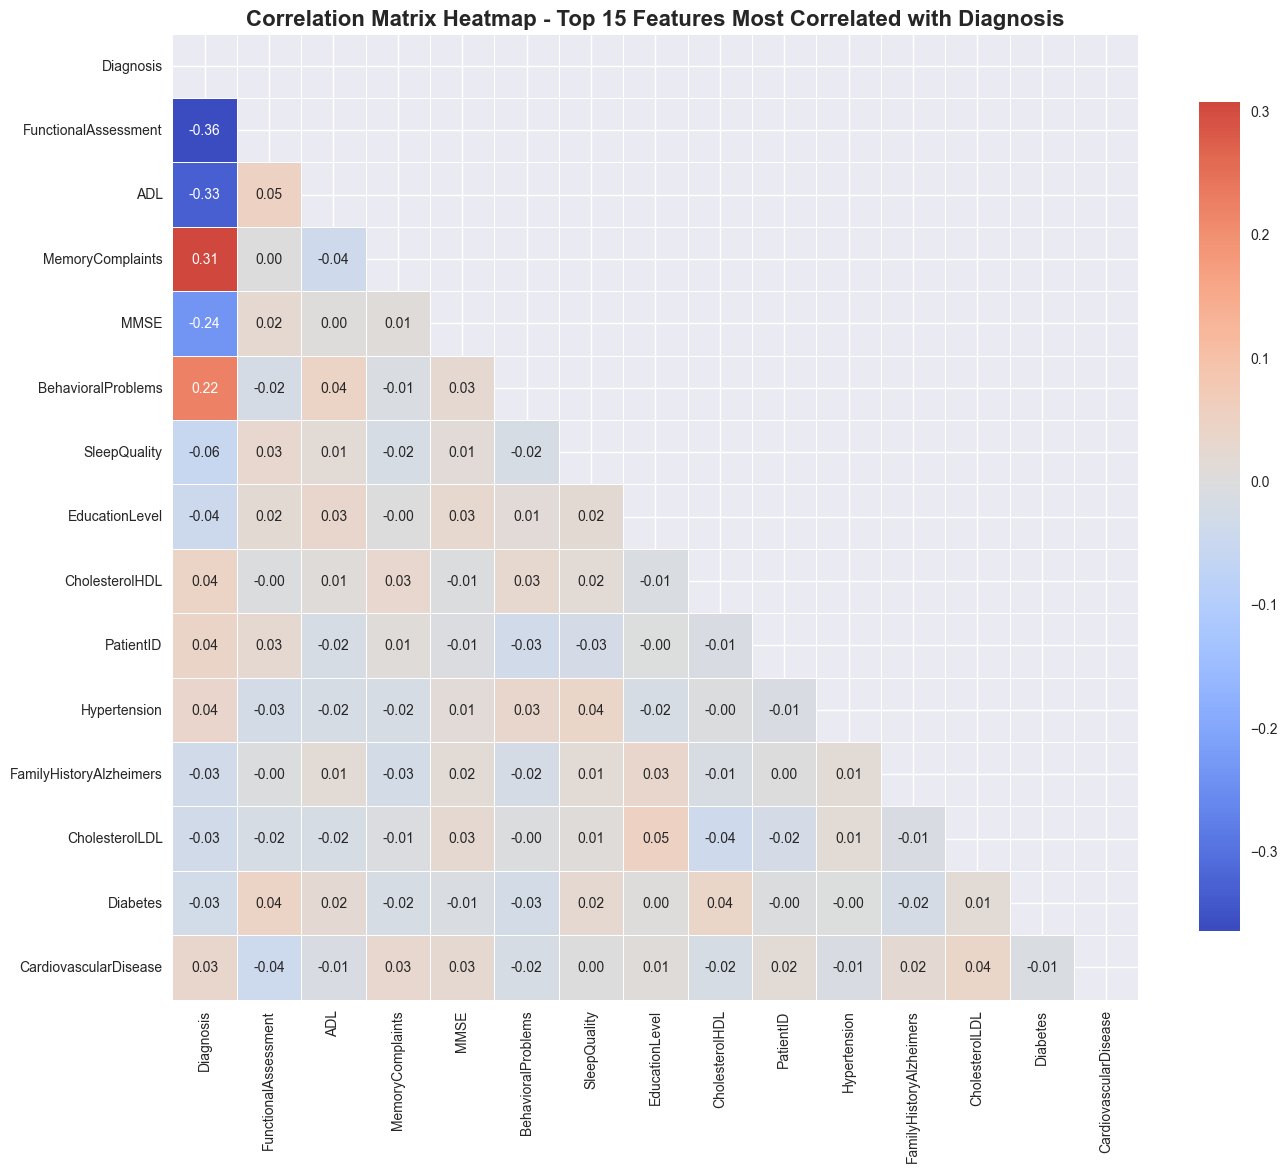


🔍 HIGHLY CORRELATED PAIRS AMONG TOP 15 FEATURES
------------------------------------------------------------
✅ No highly correlated feature pairs found (|r| > 0.7) among top 15


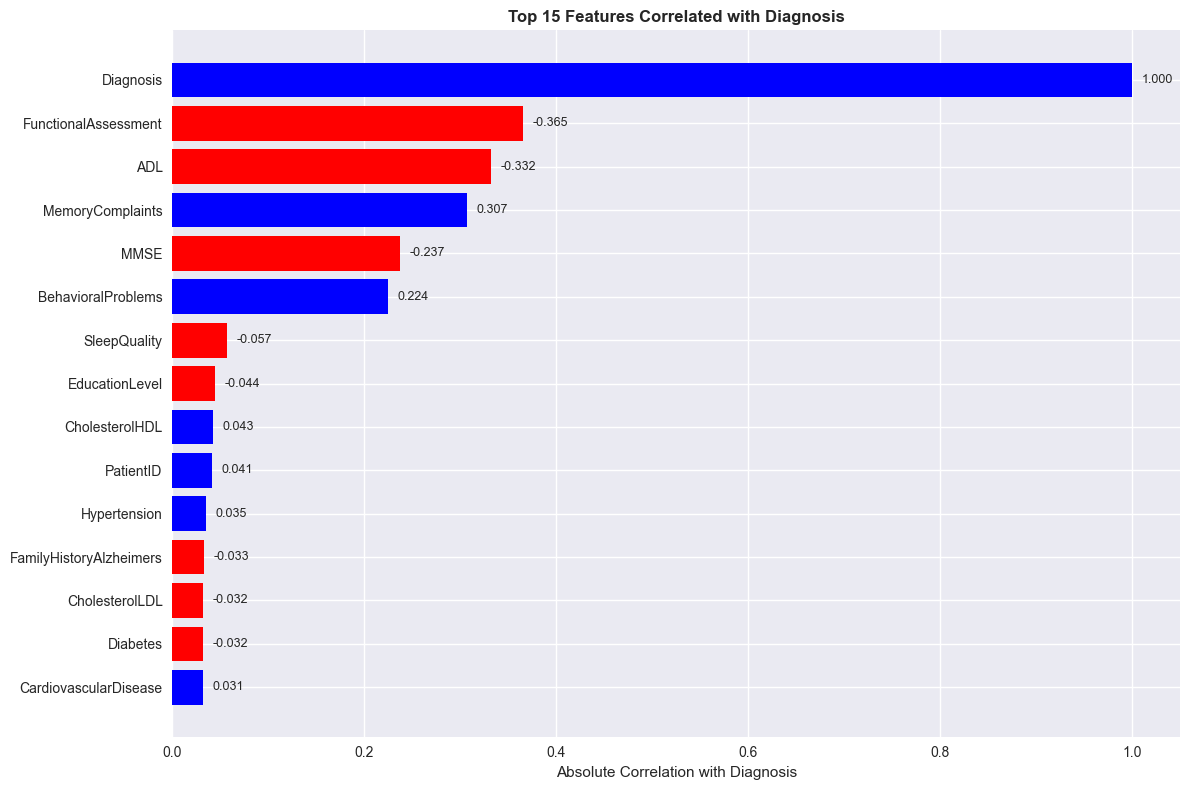

In [23]:
# Correlation Analysis
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Get numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numerical_cols) > 1:
    # Calculate correlation matrix for all features first
    correlation_matrix = df[numerical_cols].corr()
    
    # Correlation with target variable to identify top features
    if 'Diagnosis' in df.columns:
        print("\n🎯 IDENTIFYING TOP 15 FEATURES CORRELATED WITH DIAGNOSIS")
        print("-" * 60)
        
        # Encode target for correlation analysis
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        df_temp = df.copy()
        df_temp['Diagnosis_encoded'] = le.fit_transform(df_temp['Diagnosis'])
        
        # Calculate correlations with target
        target_correlations = df_temp[numerical_cols + ['Diagnosis_encoded']].corr()['Diagnosis_encoded'].drop('Diagnosis_encoded')
        target_correlations_abs = target_correlations.abs().sort_values(ascending=False)
        
        # Get top 15 features
        top_15_features = target_correlations_abs.head(15).index.tolist()
        
        print("Top 15 features correlated with Diagnosis:")
        for i, (feature, corr) in enumerate(target_correlations_abs.head(15).items(), 1):
            print(f"{i:2d}. {feature}: {corr:.4f}")
        
        # Create correlation matrix for top 15 features only
        top_15_correlation_matrix = df[top_15_features].corr()
        
        # Create correlation heatmap for top 15 features
        plt.figure(figsize=(14, 12))
        mask = np.triu(np.ones_like(top_15_correlation_matrix, dtype=bool))
        sns.heatmap(top_15_correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                   center=0, square=True, linewidths=0.5, fmt='.2f',
                   cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix Heatmap - Top 15 Features Most Correlated with Diagnosis', 
                  fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(output_dir / 'correlation_heatmap_top15.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Find highly correlated feature pairs among top 15
        print("\n🔍 HIGHLY CORRELATED PAIRS AMONG TOP 15 FEATURES")
        print("-" * 60)
        
        high_corr_pairs = []
        for i in range(len(top_15_correlation_matrix.columns)):
            for j in range(i+1, len(top_15_correlation_matrix.columns)):
                corr_value = top_15_correlation_matrix.iloc[i, j]
                if abs(corr_value) > 0.7:  # Lower threshold for top features
                    feature1 = top_15_correlation_matrix.columns[i]
                    feature2 = top_15_correlation_matrix.columns[j]
                    high_corr_pairs.append((feature1, feature2, corr_value))
        
        if high_corr_pairs:
            print("Feature pairs with correlation > 0.7:")
            for feature1, feature2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
                print(f"  {feature1} ↔ {feature2}: {corr:.4f}")
        else:
            print("✅ No highly correlated feature pairs found (|r| > 0.7) among top 15")
        
        # Visualize correlation with target variable
        plt.figure(figsize=(12, 8))
        top_features_corr = target_correlations_abs.head(15)
        bars = plt.barh(range(len(top_features_corr)), top_features_corr.values, 
                       color=['red' if x < 0 else 'blue' for x in target_correlations[top_features_corr.index]])
        plt.yticks(range(len(top_features_corr)), top_features_corr.index)
        plt.xlabel('Absolute Correlation with Diagnosis')
        plt.title('Top 15 Features Correlated with Diagnosis', fontweight='bold')
        plt.gca().invert_yaxis()
        
        # Add correlation values as text
        for i, (feature, corr_val) in enumerate(top_features_corr.items()):
            original_corr = target_correlations[feature]
            plt.text(corr_val + 0.01, i, f'{original_corr:.3f}', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.savefig(output_dir / 'target_correlation_ranking_top15.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # Interactive correlation heatmap for top 15 features with Plotly
        fig = go.Figure(data=go.Heatmap(
            z=top_15_correlation_matrix.values,
            x=top_15_correlation_matrix.columns,
            y=top_15_correlation_matrix.columns,
            colorscale='RdBu',
            zmid=0,
            text=top_15_correlation_matrix.values,
            texttemplate='%{text:.2f}',
            textfont={"size": 10},
            hoverongaps=False
        ))
        
        fig.update_layout(
            title='Interactive Correlation Matrix - Top 15 Features',
            xaxis_title='Features',
            yaxis_title='Features',
            width=700,
            height=700
        )
        
        fig.show()
        
    else:
        print("❌ 'Diagnosis' column not found - showing full correlation matrix")
        # Fallback to full correlation matrix
        plt.figure(figsize=(16, 12))
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
                   center=0, square=True, linewidths=0.5, fmt='.2f',
                   cbar_kws={"shrink": .8})
        plt.title('Correlation Matrix Heatmap (All Numerical Features)', 
                  fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.savefig(output_dir / 'correlation_heatmap_full.png', dpi=300, bbox_inches='tight')
        plt.show()
    
else:
    print("❌ Insufficient numerical columns for correlation analysis")